- 用numpy 实现 nn.Linear, 能够进行backward训练

Epoch 0, Loss: 583.834954
Epoch 100, Loss: 2.274884
Epoch 200, Loss: 2.253108
Epoch 300, Loss: 2.252715
Epoch 400, Loss: 2.252708
Epoch 500, Loss: 2.252708
Epoch 600, Loss: 2.252708
Epoch 700, Loss: 2.252708
Epoch 800, Loss: 2.252708
Epoch 900, Loss: 2.252708
Learned weights: [4.00300425]
Learned bias: [1.06100521]
True weights: [2.0]
True bias: [1.0]


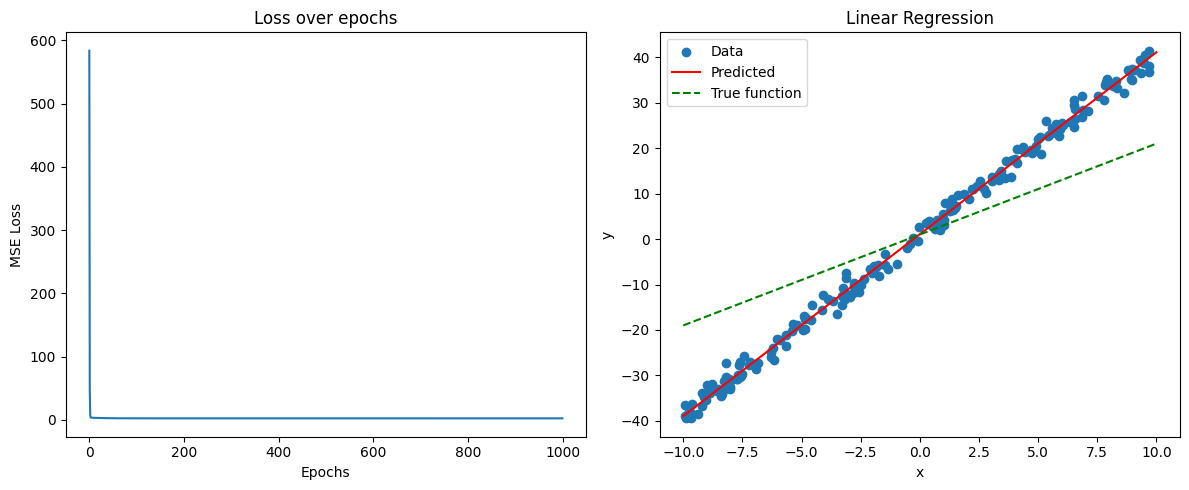

In [5]:
import numpy as np

class linear:
    def __init__(self, input_dim, output_dim, learning_rate=0.01):
        # 初始化权重和偏置
        self.weights = np.random.randn(input_dim, output_dim) * 0.01
        self.bias = np.zeros(output_dim)
        self.learning_rate = learning_rate
        
        # 保存前向传播的输入，用于反向传播
        self.input = None
        # 保存梯度
        self.dweights = None
        self.dbias = None
    
    def forward(self, x):
        # 保存输入用于反向传播
        self.input = x
        # 计算 y = x·W + b
        return np.dot(x, self.weights) + self.bias
    
    def backward(self, dout):
        # dout是损失对当前层输出的梯度
        # 计算权重和偏置的梯度
        self.dweights = np.dot(self.input.T, dout)
        self.dbias = np.sum(dout, axis=0)
        
        # 计算前一层的梯度
        dx = np.dot(dout, self.weights.T)
        return dx
    
    def update_parameters(self):
        # 使用梯度下降更新参数
        self.weights -= self.learning_rate * self.dweights
        self.bias -= self.learning_rate * self.dbias

# 定义均方误差损失函数
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# 均方误差损失函数的导数
def mse_gradient(y_pred, y_true):
    return 2 * (y_pred - y_true) / y_pred.shape[0]

# 生成一个简单的一次函数数据集: y = 2x + x
def generate_linear_data(n_samples=100, noise=1.5):
    x = np.random.uniform(-10, 10, (n_samples, 1))
    y = 4 * x + 1 + np.random.randn(n_samples, 1) * noise
    return x, y

# 训练模型
def train(model, x, y, epochs=500):
    losses = []
    for epoch in range(epochs):
        # 前向传播
        y_pred = model.forward(x)
        
        # 计算损失
        loss = mse_loss(y_pred, y)
        losses.append(loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")
        
        # 反向传播
        grad = mse_gradient(y_pred, y)
        model.backward(grad)
        
        # 更新参数
        model.update_parameters()
    
    return losses

# 生成数据
x_train, y_train = generate_linear_data(200)

# 创建模型
model = linear(input_dim=1, output_dim=1, learning_rate=0.01)

# 训练模型
losses = train(model, x_train, y_train, epochs=1000)

# 打印最终学习到的权重和偏置
print(f"Learned weights: {model.weights.flatten()}")
print(f"Learned bias: {model.bias.flatten()}")
print(f"True weights: [2.0]")
print(f"True bias: [1.0]")

# 可视化结果
import matplotlib.pyplot as plt

# 损失曲线
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')

# 拟合结果
plt.subplot(1, 2, 2)
plt.scatter(x_train, y_train, label='Data')
x_test = np.linspace(-10, 10, 100).reshape(-1, 1)
y_pred = model.forward(x_test)
plt.plot(x_test, y_pred, 'r', label='Predicted')
plt.plot(x_test, 2*x_test + 1, 'g--', label='True function')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()